In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv('UNSW_NB15_traintest_backdoor.csv')
df = df.drop(df.columns[-1], axis=1)  # Remove 'Class' column

In [3]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [4]:
# Apply PCA to reduce to 20 dimensions
pca = PCA(n_components=20)
data_pca = pca.fit_transform(data_scaled)

In [5]:
# Apply K-means clustering with EM
kmeans = GaussianMixture(n_components=5)  # Assuming 5 clusters
kmeans.fit(data_pca)
clusters = kmeans.predict(data_pca)

In [6]:
# Reduce to 2D for visualization (using PCA)
pca_2d = PCA(n_components=2)
data_2d = pca_2d.fit_transform(data_pca)

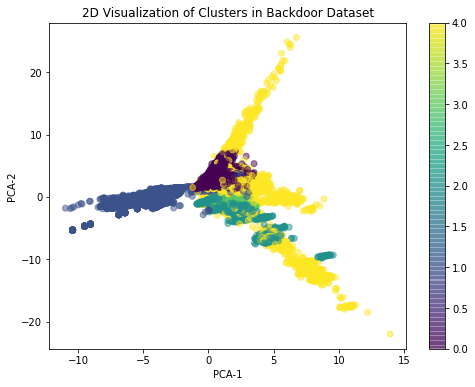

In [7]:
# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('2D Visualization of Clusters in Backdoor Dataset')
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.colorbar()
plt.show()

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [9]:
# Load dataset
df = pd.read_csv('creditcard.csv')
data = df.drop(['Time', 'Amount', 'Class'], axis=1)

In [10]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [11]:
# Autoencoder architecture
input_dim = data_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
encoder_layer1 = Dense(24, activation='relu')(input_layer)
encoder_layer2 = Dense(20, activation='relu')(encoder_layer1)
encoder_layer3 = Dense(15, activation='relu')(encoder_layer2)
bottleneck = Dense(10, activation='relu')(encoder_layer3)
decoder_layer1 = Dense(15, activation='relu')(bottleneck)
decoder_layer2 = Dense(20, activation='relu')(decoder_layer1)
decoder_layer3 = Dense(24, activation='relu')(decoder_layer2)
output_layer = Dense(input_dim, activation='relu')(decoder_layer3)

In [12]:
# Compile the model
autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
# Train the model
autoencoder.fit(data_scaled, data_scaled, epochs=50, batch_size=32, shuffle=True, validation_split=0.1)

Epoch 1/50
8011/8011 [==============================] - 5s 611us/step - loss: 0.7701 - val_loss: 0.6510
Epoch 2/50
8011/8011 [==============================] - 5s 638us/step - loss: 0.6960 - val_loss: 0.6174
Epoch 3/50
8011/8011 [==============================] - 5s 651us/step - loss: 0.6735 - val_loss: 0.6037
Epoch 4/50
8011/8011 [==============================] - 5s 616us/step - loss: 0.6617 - val_loss: 0.5889
Epoch 5/50
8011/8011 [==============================] - 5s 609us/step - loss: 0.6523 - val_loss: 0.5826
Epoch 6/50
8011/8011 [==============================] - 5s 613us/step - loss: 0.6479 - val_loss: 0.5789
Epoch 7/50
8011/8011 [==============================] - 5s 614us/step - loss: 0.6441 - val_loss: 0.5739
Epoch 8/50
8011/8011 [==============================] - 5s 603us/step - loss: 0.6379 - val_loss: 0.5719
Epoch 9/50
8011/8011 [==============================] - 5s 593us/step - loss: 0.6326 - val_loss: 0.5719
Epoch 10/50
8011/8011 [==============================] - 5s 602u

In [14]:
# Extract bottleneck features (10-dimensional)
encoder = Model(inputs=input_layer, outputs=bottleneck)
bottleneck_features = encoder.predict(data_scaled)

In [15]:
# K-means clustering
kmeans = KMeans(n_clusters=5)  # Assuming 5 clusters
kmeans.fit(bottleneck_features)
clusters = kmeans.labels_

In [16]:
# tSNE for 2D visualization
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(bottleneck_features)

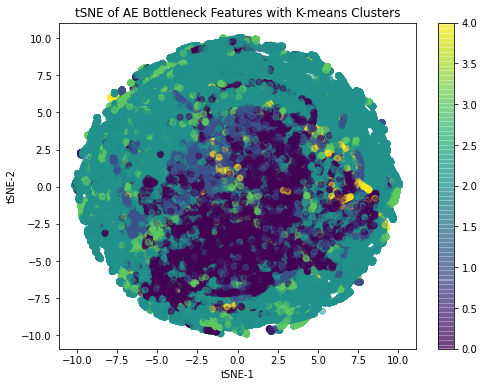

In [17]:
# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.colorbar()
plt.title('tSNE of AE Bottleneck Features with K-means Clusters')
plt.xlabel('tSNE-1')
plt.ylabel('tSNE-2')
plt.show()